# Predicting Bank Churn

The target variable for this Machine Learning analysis is whether or not a customer customer churned (exited).

## Import Packages and Data

In this section, the Python packages and dataframe are read into Python.

In [331]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [234]:
# Import data
try:
    churn = pd.read_csv('Users/kellyshreeve/Desktop/Data-Sets/Churn.csv')
except:
    churn = pd.read_csv('/datasets/Churn.csv')

In [235]:
# Print info
print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [236]:
# Print top 15 rows
display(churn.head(15))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


## Prepare Data

The data are cleaned for analysis by addressing variable names, data types, missing values, and duplicates. Categorical features are prepared in two different ways: 1) Label encoded for Decision Tree/Random Forest models, 2) One Hot Encoded for Logistic Regression models.

### Convert Variable Names to Snake Case

In [237]:
# Convert column names to lower case
churn.columns = churn.columns.str.lower()

print(churn.columns)

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')


In [238]:
# Insert underscore in multi-word column names
churn = churn.rename(columns={'rownumber':'row_number', 'customerid':'customer_id',
                              'creditscore':'credit_score', 'numofproducts':'num_of_products',
                              'hascrcard':'has_cr_card', 'isactivemember':'is_active_member',
                              'estimatedsalary':'estimated_salary'})

print(churn.columns)
display(churn.head())

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')


,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


All column names are converted to snake case.

### Check Data Types

In [239]:
# Check data types
print(churn.dtypes)

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure              float64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object


All data types are correct.

### Address Missing Values

In [240]:
# Find missing values
print('Number of missing values by variable:')
print()
print(churn.isna().sum())

Number of missing values by variable:

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64


Tenure is missing 909 values. All other variables have complete information.

In [241]:
# Calculate percentage of missing values in Tenure
missing_percent = (churn['tenure'].isna().sum()/len(churn['tenure'])) * 100

print(f'Percent missing in tenure: {missing_percent:.2f}%')

Percent missing in tenure: 9.09%


Tenure is missing less than 10%, so imputation will be performed.

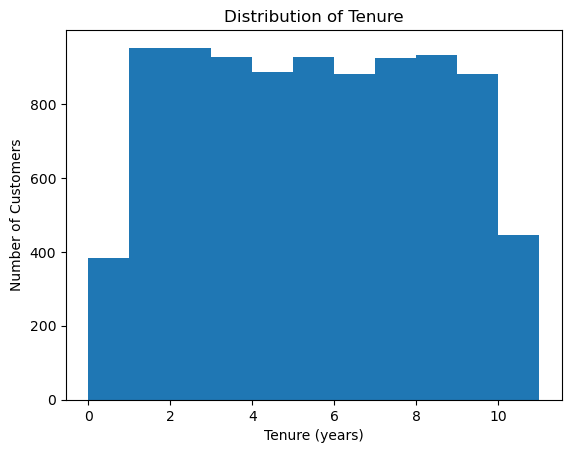

In [242]:
# Check distribution of tenure with a histogram
churn['tenure'].plot(kind='hist', bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

plt.title('Distribution of Tenure')
plt.xlabel('Tenure (years)')
plt.ylabel('Number of Customers')

plt.show()

The distribtuion of Tenure is largely uniformly distributed with a drop off in number of customers with tenures of 0-1 years and 9-10 years. Because the distribution is symmetrical and the tenure lengths are discrete numbers, the best method of imputation is to use the median of tenure.

In [243]:
# Replace missing Tenure values with the median of Tenure
churn['tenure'] = churn['tenure'].fillna(churn['tenure'].median())

# Frequency distribution of tenures after imputation
print('Frequency Distribution of Tenure after imputation:')
display(churn['tenure'].value_counts()
        .reset_index()
        .rename(columns={'tenure':'count', 'index':'tenure'})
        .sort_values(by='tenure')
        .reset_index(drop=True))

Frequency Distribution of Tenure after imputation:


,tenure,count
0,0.0,382
1,1.0,952
2,2.0,950
3,3.0,928
4,4.0,885
5,5.0,1836
6,6.0,881
7,7.0,925
8,8.0,933
9,9.0,882


In [244]:
# Re-run missing value counts
print('Missing values after imputation:')

display(churn.isna().sum())

Missing values after imputation:


row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

After imputation, all variables now have complete information.

### Check for Duplicates

In [245]:
# Check for fully duplicated rows
full_duplicates = churn.duplicated().sum()

print(f'Number of fully duplicated rows: {full_duplicates}')

Number of fully duplicated rows: 0


There are no fully duplicated rows.

In [246]:
# Check for implicit duplicates in geography
print(churn['geography'].unique())

['France' 'Spain' 'Germany']


There are no implicit duplicates in geography.

In [247]:
# Check for implicit duplicates in gender
print(churn['gender'].unique())

['Female' 'Male']


There are no implicit duplicates in gender. 

### Prepare Categorical Features

In [317]:
# Create data frame with label encoding for tree models
churn_label = churn.copy() # copy dataframe into a dataframe for label encoding

encoder = OrdinalEncoder() # initiate encoder

churn_label[['gender', 'geography']] = encoder.fit_transform(churn_label[['gender', 'geography']]) # transform gender and geography to label encoding

display(churn_label.head())

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,0.0,0.0,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2.0,0.0,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0.0,0.0,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0.0,0.0,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2.0,0.0,43,2.0,125510.82,1,1,1,79084.10,0


Geography and gender have been label encoded and saved in churn_label to use for tree modeling.

In [318]:
# Create dataframe with one hot encoded variables for logistic regression
churn_ohe = pd.get_dummies(churn, columns=['geography', 'gender'], drop_first=True)

display(churn_ohe.head())

,row_number,customer_id,surname,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Geography and gender have been One Hot Encoded and saved in churn_ohe to use for logistic regression models.

### Data Preparation Conclusion

Variable names are converted to snake case, data types are correct, missing values in tenure have been imputed with the median of tenure, and there are no concerns about duplication in the dataframe. Two new dataframes have been created, one with Label Encoding for tree models and the second with One Hot Encoding for Logistic Regression models. The data is clean, prepared, and ready for analysis.

## Train Models with Imbalance

 In this section, the balance of classes is inspected, and the data are used to fit multiple Machine Learnng models to predict the imbalanced class data. Hyperparameters are tuned for Decision Tree Classifier and Random Foreset Classifier and the threshold is adjusted for Logistic Regression with the purpose of maximizing the F1 score while the classes are imbalanced. For Decision Tree Classification and Random Forest Classification, categorical features are label encoded and continuous variables are left in the scale of the original data. For Logistic Regression, categorical features are encoded with One Hot Encoding and continuous features are scaled. 

### Inspect Balance of Classes

In [248]:
# Check balance of classes
class_percentages = (churn['exited'].value_counts().reset_index(drop=True)/len(churn['exited']))*100

print('Percent of each class in the target variable:')
display(class_percentages)

Percent of each class in the target variable:


0    79.63
1    20.37
Name: exited, dtype: float64

The percent of customers who churned is much lower than the pecent of customers who did not churn. This would be considered an instance of imbalanced classification.

### Imbalanced Classification Decision Tree and Classification Random Forest

#### Split Tree dataframe into train, validate, and test

In [250]:
# Split data into train (60%), validate (20%), and test (20%)

# Define features and target
features_tree = churn_label.drop(['row_number', 'customer_id', 'surname', 'exited'], axis=1)                    
target_tree = churn_label['exited']

# Split off test set (20%)
features_remaining_tree, features_test_tree, target_remaining_tree, target_test_tree = train_test_split(
    features_tree, target_tree, test_size=0.2, random_state=12345)

# Split remaining into training (60%) and validation (20%)
features_train_tree, features_valid_tree, target_train_tree, target_valid_tree = train_test_split(
    features_remaining_tree, target_remaining_tree, test_size=0.25, random_state=12345)

# Check shape of training, validation, and test
print(f'Features Training: {features_train_tree.shape}')
print(f'Features Validation: {features_valid_tree.shape}')
print(f'Features Test: {features_test_tree.shape}')
print()
print(f'Target Training: {target_train_tree.shape}')
print(f'Target Validation: {target_valid_tree.shape}')
print(f'Target Test: {target_test_tree.shape}')

Features Training: (6000, 10)
Features Validation: (2000, 10)
Features Test: (2000, 10)

Target Training: (6000,)
Target Validation: (2000,)
Target Test: (2000,)


The label encoded dataset has been split into training (60%), validate (20%), and test (20%).

#### Fit Decision Tree Classifier 

In [251]:
# Tune hyperparameters to maximize F1
best_tree_imbal = None
best_depth_tree_imbal = 0
best_f1_tree_imbal = 0

for i in range(1, 10):
    tree_imbal = DecisionTreeClassifier(max_depth=i, random_state=12345)
    tree_imbal.fit(features_train_tree, target_train_tree)
    predicted_valid_tree = tree_imbal.predict(features_valid_tree)
    f1_tree = f1_score(target_valid_tree, predicted_valid_tree)
    if f1_tree > best_f1_tree_imbal:
        best_tree_imbal = tree_imbal
        best_depth_tree_imbal = i
        best_f1_tree_imbal = f1_tree
        
print('Decision Tree Classifier Imbalanced Classes')
print(f'Maximum F1 (depth={best_depth_tree_imbal}) = {best_f1_tree_imbal:.2f}')
    

Decision Tree Classifier Imbalanced Classes
Maximum F1 (depth=7) = 0.52


The Decision Tree Classifier with imbalanced classes achieved a maximim F1 of 0.52 at a tree depth of 7. This is a low score, signifying the model has a high number of false positives.

#### Fit Random Forest Classifier 

In [266]:
# Tune hyperparameters to maximize F1
best_forest_imbal = None
best_depth_forest_imbal = 0
best_estimators_forest_imbal = 0
best_f1_forest_imbal = 0

for i in range(1, 10):
    for j in range(10, 50, 10):
        forest_imbal = RandomForestClassifier(max_depth=i, n_estimators=j, random_state=12345)
        forest_imbal.fit(features_train_tree, target_train_tree)
        predicted_valid_forest = forest_imbal.predict(features_valid_tree)
        f1_forest = f1_score(target_valid_tree, predicted_valid_forest)
        if f1_forest > best_f1_forest_imbal:
            best_forest_imbal = forest_imbal
            best_depth_forest_imbal = i
            best_estimators_forest_imbal = j
            best_f1_forest_imbal = f1_forest

In [267]:
# Print results
print('Random Forest Classifier Imbalanced Classes')
print(f'Maximum F1 (depth={best_depth_forest_imbal}, n_estimators={best_estimators_forest_imbal}) = {best_f1_forest_imbal:.2f}')  

Random Forest Classifier Imbalanced Classes
Maximum F1 (depth=9, n_estimators=20) = 0.54


The Random Forest Classifier with imbalanced classes achieved a maximum F1 of 0.54 at a depth of 9 with 20 trees. This is only slightly better than the Decision Tree Classifier with a depth of 7. It is still a low F1 score, representing a model with many false positives. 

### Imbalanced Logistic Regression 

#### Split Logistic Regression dataframe into train, validate, and test

In [255]:
# Split data into train (60%), validate (20%), and test (20%)

# Define features and target
features_logreg = churn_ohe.drop(['row_number', 'customer_id', 'surname', 'exited'], axis=1)                    
target_logreg = churn_ohe['exited']

# Split off test set (20%)
features_remaining_logreg, features_test_logreg, target_remaining_logreg, target_test_logreg = train_test_split(
    features_logreg, target_logreg, test_size=0.2, random_state=12345)

# Split remaining into training (60%) and validation (20%)
features_train_logreg, features_valid_logreg, target_train_logreg, target_valid_logreg = train_test_split(
    features_remaining_logreg, target_remaining_logreg, test_size=0.25, random_state=12345)

# Check shape of training, validation, and test
print(f'Features Training: {features_train_logreg.shape}')
print(f'Features Validation: {features_valid_logreg.shape}')
print(f'Features Test: {features_test_logreg.shape}')
print()
print(f'Target Training: {target_train_logreg.shape}')
print(f'Target Validation: {target_valid_logreg.shape}')
print(f'Target Test: {target_test_logreg.shape}')

Features Training: (6000, 11)
Features Validation: (2000, 11)
Features Test: (2000, 11)

Target Training: (6000,)
Target Validation: (2000,)
Target Test: (2000,)


The One Hot Encoded dataset has been split into training (60%), validation (20%), and test (20%).

#### Scale numeric features

In [256]:
# Scale numeric features
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary'] # numeric features

scaler = StandardScaler()
scaler.fit(features_train_logreg[numeric]) # fit scaling

features_train_logreg[numeric] = scaler.transform(features_train_logreg[numeric]) # transform variables
features_valid_logreg[numeric] = scaler.transform(features_valid_logreg[numeric])

print('Logistic Regression features train:')
display(features_train_logreg.head())
print()
print('Logistic Regression features valid:')
display(features_valid_logreg.head())

Logistic Regression features train:


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
492,-0.134048,-0.078068,-0.369113,0.076163,0.816929,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,-0.007415,0.136391,-0.896909,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,-1.454209,0.358435,-0.896909,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,-1.092511,0.651725,-0.896909,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.715982,0.813110,0.816929,1,1,0.801922,0,0,0



Logistic Regression features valid:


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
2358,0.175393,0.399118,-1.454209,1.385698,-0.896909,0,1,-1.466761,0,0,1
8463,-1.299609,0.971741,-1.092511,-1.232442,-0.896909,1,0,0.254415,0,1,1
163,0.711757,-0.268942,-1.092511,-1.232442,0.816929,1,1,0.122863,0,1,0
3074,-0.391916,0.494555,0.354284,0.672529,-0.896909,1,0,0.585847,1,0,0
5989,0.165078,1.353490,1.801078,0.536522,-0.896909,0,0,1.462457,0,0,0


Categorical variables have been One Hot Encoded, numeric variables have been scaled, and the data is split into training, validation, and test. The data is ready to fit and tune a logistic regression.

#### Fit Logistic Regression

In [260]:
# Train logistic regression
logreg_imbal = LogisticRegression(random_state=12345, solver='liblinear') # initiate model
logreg_imbal.fit(features_train_logreg, target_train_logreg) # fit model

probabilities_valid_imbal = logreg_imbal.predict_proba(features_valid_logreg)
probabilities_one_valid = probabilities_valid_imbal[:, 1]

best_threshold_logreg_imbal = 0
best_f1_logreg_imbal = 0

for threshold in np.arange(0, .9, 0.02):
    predicted_valid_logreg_imbal = probabilities_one_valid > threshold
    f1_logreg_imbal = f1_score(target_valid_logreg, predicted_valid_logreg_imbal) # F1 score for validate set
    if f1_logreg_imbal > best_f1_logreg_imbal:
        best_threshold_logreg_imbal = threshold
        best_f1_logreg_imbal = f1_logreg_imbal

print('Logistic Regression Imbalanced Classes')
print(f'Maximum F1 (threshold={best_threshold_logreg_imbal})= {best_f1_logreg_imbal:.2f}')

Logistic Regression Imbalanced Classes
F1 (threshold=0.32)= 0.49


The the Logistic Regression model achieved a maximum F1 score of 0.49 at a threshold of 0.32 on the validation set. This is again a low F1 score and is lower than both the Decision Tree and Random Forest models. The Logistic Regression had a high number of false positives on the validation set, using the imbalanced data, and is the worst performing of the three. 

### Imbalanced Model Training Conclusion

Using the imbalanced data to fit and tune Machine Learning models was largely unsuccessful. All the models achieved F1 scores around 0.5, meaning they had high false postive rates on the validation set. The Random Forest Classifier with a depth of 9 and 20 trees was the best performing model but still had high prediction inaccuracy (F1 = 0.54). This was followed by the Decision Tree Classifier with a depth of 7 (F1 = 0.52) and the Logistic Regression with a threshold of 0.32 (F1 = 0.49). All of these models leave much to be desired for prediction performance. 

## Improve the Quality of the Model by Addressing Class Imbalance

In this section, two class balancing strategies are implemented to raise the F1 score on the validation class. The first is class weight adjustment, where the class weight is increased for the minority class. The second is upsampling, where the minority class is resampled to more closely match the frequency of the majority class. All three models are re-fit and cycled through the same hyperparameter tuning and threshold adjustment for each class balancing strategy. The purpose is to maximize the F1 score.

### Class Weight Adjustment

Each model is initiated with the class_weight='balanced' parameter and the models are re-tuned to maximize F1 on the validation set.

In [262]:
# Re-Fit Decision Tree Classifier with balanced weights
best_tree_bal = None
best_depth_tree_bal = 0
best_f1_tree_bal = 0

for i in range(1, 10):
    tree_bal = DecisionTreeClassifier(max_depth=i, class_weight='balanced', random_state=12345) # balance weights
    tree_bal.fit(features_train_tree, target_train_tree)
    predicted_valid_tree = tree_bal.predict(features_valid_tree) # predicted class for the validate set
    f1_tree = f1_score(target_valid_tree, predicted_valid_tree) # F1 score for the validate set
    if f1_tree > best_f1_tree_bal:
        best_tree_bal = tree_bal
        best_depth_tree_bal = i
        best_f1_tree_bal = f1_tree
        
print('Decision Tree Classifier Balanced Classes')
print(f'Maximum F1 (depth={best_depth_tree_bal}) = {best_f1_tree_bal:.2f}')

Decision Tree Classifier Imbalanced Classes
Maximum F1 (depth=6) = 0.56


After class weight adjustment, the Decision Tree Classifier achieved a maximum F1 of 0.56 with a tree depth of 6. This is still a moderately low F1 score, though an improvement over the Decision Tree Classifier with imbalanced classes.

In [321]:
# Re-fit the Classification Random Forest with balanced weights
best_forest_bal = None
best_depth_forest_bal = 0
best_estimators_forest_bal = 0
best_f1_forest_bal = 0

for i in range(1, 20):
    for j in range(10,100, 10):
        forest_bal = RandomForestClassifier(max_depth=i, n_estimators=j, 
                                            class_weight='balanced', random_state=12345) # balance weights
        forest_bal.fit(features_train_tree, target_train_tree)
        predicted_valid_forest_bal = forest_bal.predict(features_valid_tree) # predicted class for the validate set
        f1_forest = f1_score(target_valid_tree, predicted_valid_forest_bal) # F1 score for the validate set
        if f1_forest > best_f1_forest_bal:
            best_forest_bal = forest_bal
            best_depth_forest_bal = i
            best_estimators_forest_bal = j
            best_f1_forest_bal = f1_forest

In [323]:
# Print results
print('Random Forest Classifier Balanced Classes')
print(f'Maximum F1 (depth={best_depth_forest_bal}, n_estimators={best_estimators_forest_bal}) = {best_f1_forest_bal:.2f}')  

Random Forest Classifier Balanced Classes
Maximum F1 (depth=11, n_estimators=50) = 0.59


The Random Forest Classifier with balanced class weights achieved a maximum F1 of 0.58 with a tree depth of 11 and 50 trees. This is still only a moderately strong F1 score but is the highest F1 achieved this far.

In [265]:
# Re-fit the Logistic Regression with balanced weights
logreg_bal = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') # balance weights
logreg_bal.fit(features_train_logreg, target_train_logreg) # fit model

probabilities_valid_bal = logreg_bal.predict_proba(features_valid_logreg) # predicted probabilites valid set
probabilities_one_valid = probabilities_valid_bal[:, 1]

best_threshold_logreg_bal = 0
best_f1_logreg_bal = 0

for threshold in np.arange(0, .9, 0.02):
    predicted_valid_logreg_bal = probabilities_one_valid > threshold
    f1_logreg_bal = f1_score(target_valid_logreg, predicted_valid_logreg_bal) # F1 score for validate set
    if f1_logreg_bal > best_f1_logreg_bal:
        best_threshold_logreg_bal = threshold
        best_f1_logreg_bal = f1_logreg_bal

print('Logistic Regression Balanced Classes')
print(f'Maximum F1 (threshold={best_threshold_logreg_bal})= {best_f1_logreg_bal:.2f}')

Logistic Regression Imbalanced Classes
F1 (threshold=0.64)= 0.49


The Logistic Regression with balanced class weights achieved a maximum F1 score of 0.49 at a threshold of 0.64. This is still a low F1 and does not show any improvement over the model with imbalanced weights.

### Upsampling

Both tree and logistic regression dataframes are upsampled and models are re-fit and re-tuned with the upsampled data.

#### Upsample Dataframes

In [271]:
# Define upsampling function
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # multiply features in class one by repeat value and combine with features in class zero
    features_upsampled = pd.concat([features_zeros] + [features_ones]*repeat) 
    # multiply target in class one by repeat value and combine with target in class zero
    target_upsampled = pd.concat([target_zeros] + [target_ones]*repeat) 
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345) # shuffle upsampled dataframe
    
    return features_upsampled, target_upsampled

In [310]:
# Upsample Tree Dataframe
features_train_tree_upsamp, target_train_tree_upsamp = upsample(
    features_train_tree, target_train_tree, 4
) 

print(f'Training Features Tree Upsampled: {features_train_tree_upsamp.shape}')
print(f'Training Target Tree Upsampled: {target_train_tree_upsamp.shape}')
print()

# Check balance of classes
class_count_upsamp = target_train_tree_upsamp.value_counts().reset_index().rename(columns={'index':'exited', 'exited':'percent'})
class_percentages_upsamp = (class_count_upsamp['percent']/len(target_train_tree_upsamp))*100

print('Percent of each class in the upsampled target variable:')
display(class_percentages_upsamp)

Training Features Tree Upsampled: (9657, 10)
Training Target Tree Upsampled: (9657,)

Percent of each class in the upsampled target variable:


0    50.491871
1    49.508129
Name: percent, dtype: float64

In [311]:
# Upsample Logistic Regression Dataframe
features_train_logreg_upsamp, target_train_logreg_upsamp = upsample(
    features_train_logreg, target_train_logreg, 4
)

print(f'Training Features Tree Upsampled: {features_train_logreg_upsamp.shape}')
print(f'Training Target Tree Upsampled: {target_train_logreg_upsamp.shape}')
print()

# Check balance of classes
class_count_logreg_upsamp = target_train_logreg_upsamp.value_counts().reset_index().rename(columns={'index':'exited', 'exited':'percent'})
class_percentages_logreg_upsamp = (class_count_upsamp['percent']/len(target_train_logreg_upsamp))*100

print('Percent of each class in the upsampled target variable:')
display(class_percentages_logreg_upsamp)

Training Features Tree Upsampled: (9657, 11)
Training Target Tree Upsampled: (9657,)

Percent of each class in the upsampled target variable:


0    50.491871
1    49.508129
Name: percent, dtype: float64

After upsampling, the training dataframes have 9657 total rows. Of these, 50.5% did not churn and 49.5% did churn. These are approximately balanced classes.

#### Re-Fit Models with Upsampled Data

In [313]:
# Re-Fit Decision Tree Classifier with upsampled data
best_tree_upsamp = None
best_depth_tree_upsamp = 0
best_f1_tree_upsamp = 0

for i in range(1, 10):
    tree_upsamp = DecisionTreeClassifier(max_depth=i, random_state=12345)
    tree_upsamp.fit(features_train_tree_upsamp, target_train_tree_upsamp)
    predicted_valid_tree_upsamp = tree_upsamp.predict(features_valid_tree)
    f1_tree_upsamp = f1_score(target_valid_tree, predicted_valid_tree_upsamp)
    if f1_tree_upsamp > best_f1_tree_upsamp:
        best_tree_upsamp = tree_upsamp
        best_depth_tree_upsamp = i
        best_f1_tree_upsamp = f1_tree_upsamp
        
print('Decision Tree Classifier Upsampled data')
print(f'Maximum F1 (depth={best_depth_tree_upsamp}) = {best_f1_tree_upsamp:.2f}')

Decision Tree Classifier Upsampled data
Maximum F1 (depth=6) = 0.56


After upsampling, the Decision Tree Classifier achieved a maximum F1 score of 0.56 with a depth of 6 on the validation set. This is an improvement over the imbalanced model but does not show improvement over the weighted class model.

In [319]:
# Re-fit the Classification Random Forest with upsampled data
best_forest_upsamp = None
best_depth_forest_upsamp = 0
best_estimators_forest_upsamp = 0
best_f1_forest_upsamp = 0

for i in range(1, 20):
    for j in range(10, 100, 10):
        forest_upsamp = RandomForestClassifier(max_depth=i, n_estimators=j, random_state=12345)
        forest_upsamp.fit(features_train_tree_upsamp, target_train_tree_upsamp)
        predicted_valid_forest_upsamp = forest_upsamp.predict(features_valid_tree)
        f1_forest_upsamp = f1_score(target_valid_tree, predicted_valid_forest_upsamp)
        if f1_forest_upsamp > best_f1_forest_upsamp:
            best_forest_upsamp = forest_upsamp
            best_depth_forest_upsamp = i
            best_estimators_forest_upsamp = j
            best_f1_forest_upsamp = f1_forest_upsamp

In [320]:
# Print results
print('Random Forest Classifier Upsampled')
print(f'Maximum F1 (depth={best_depth_forest_upsamp}, n_estimators={best_estimators_forest_upsamp}) = {best_f1_forest_upsamp:.2f}')  

Random Forest Classifier Upsampled
Maximum F1 (depth=11, n_estimators=80) = 0.59


After upsampling, the Random Forest Classifier was able to achieve a maximum F1 of 0.59 with a depth of 11 and 80 trees. While the F1 score is equal to the model with weighted data, the weighted model was able to achieve this score with 30 fewer trees. 

In [316]:
# Re-fit the Logistic Regression with upsampled data
logreg_upsamp = LogisticRegression(random_state=12345, solver='liblinear') # initiate model
logreg_upsamp.fit(features_train_logreg_upsamp, target_train_logreg_upsamp) # fit model

probabilities_valid_upsamp = logreg_upsamp.predict_proba(features_valid_logreg) # predicted probabilities
probabilities_one_valid_upsamp = probabilities_valid_upsamp[:, 1]

best_threshold_logreg_upsamp = 0
best_f1_logreg_upsamp = 0

for threshold in np.arange(0, .9, 0.02): # iterate over threshold values
    predicted_valid_logreg_upsamp = probabilities_one_valid_upsamp > threshold
    f1_logreg_upsamp = f1_score(target_valid_logreg, predicted_valid_logreg_upsamp) # F1 score for validate set
    if f1_logreg_upsamp > best_f1_logreg_upsamp:
        best_threshold_logreg_upsamp = threshold
        best_f1_logreg_upsamp = f1_logreg_upsamp

print('Logistic Regression Balanced Classes')
print(f'Maximum F1 (threshold={best_threshold_logreg_upsamp})= {best_f1_logreg_upsamp:.2f}')


Logistic Regression Balanced Classes
Maximum F1 (threshold=0.64)= 0.49


After upsampling, the Logistic Regression achieved a maximum F1 score of 0.49 with a threshold of 0.64 on the validation set. This is the lowest of the three models and shows no improvement over the logistic regression with imbalanced classes.

### Class Balanced Model Conclusions

Random forest classifier with weighted data.

## Final Testing

In [335]:
# Test the model on the test set
# Find predicted values for test set
predicted_test = best_forest_bal.predict(features_test_tree)

# Calculate F1 score
f1_test= f1_score(target_test_tree, predicted_test)

# Calculate roc auc score
roc_auc_test = roc_auc_score(target_test_tree, predicted_test)

print('Best Random Forest Classifier on Test Set:')
print(f'Test F1 score: {f1_test:.2f}')
print(f'Test ROC AUC: {roc_auc_test:.2f}')

Best Random Forest Classifier on Test Set:
Test F1 score: 0.60
Test ROC AUC: 0.74


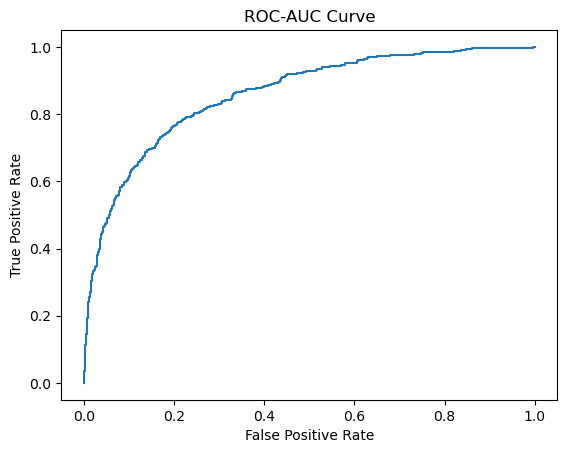

In [337]:
# Plot auc roc curve
probabilities_test = best_forest_bal.predict_proba(features_test_tree)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test_tree, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)

plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### Final Testing Conclusion

## Conclusion and Business Application